# MEDIUM ARTICLES

## References
We report here relevant references:
1. Stock Prediction in Python, 
    * https://towardsdatascience.com/stock-prediction-in-python-b66555171a2

## SETUP: Library_Import
We import all the required Python libraries

In [3]:
    # 1 Data manipulation
import numpy as np
from bs4 import BeautifulSoup as bs
import pandas as pd
import pandas_datareader
from pandas_datareader import data as wb
    # 7 Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

    # 11 Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
    # 14 More Visualizations
import chart_studio.plotly as py
import plotly
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)
    # 21 Cufflinks binds Plotly directly to pandas dataframes.
import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')
 
    # 26 IMPORT API FUNCTIONS
import quandl
import yfinance as yf
from yahoofinancials import YahooFinancials
import requests
import alpha_vantage
from alpha_vantage.timeseries import TimeSeries
#import iex
import iexfinance
from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data
from iexfinance.stocks import get_historical_intraday
from iexfinance.refdata import get_symbols
from iexfinance.data_apis import get_data_points
from iexfinance.data_apis import get_time_series
from iexfinance.altdata import get_social_sentiment
from iexfinance.altdata import get_ceo_compensation

    # 44 MISC LIB IMPORTS
import locale
from datetime import date, datetime
from nsepy import get_history
import os
import time
import csv
import json
from patsy import dmatrices

    # 54
import jupytemplate
print(jupytemplate.get_template_path())

C:\Users\gordo\AppData\Local\Continuum\anaconda3\envs\notebook\lib\site-packages\jupytemplate\jupytemplate\template.ipynb



# Data_Import & Data_Processing
* We retrieve all the required data for the analysis.

## free api


In [3]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/financials/income-statement/AAPL")
print(get_jsonparsed_data(url))

{'symbol': 'AAPL', 'financials': [{'date': '2019-09-28', 'Revenue': '2.60174e+11', 'Revenue Growth': '0.0', 'Cost of Revenue': '1.61782e+11', 'Gross Profit': '98392000000.0', 'R&D Expenses': '16217000000.0', 'SG&A Expense': '18245000000.0', 'Operating Expenses': '34462000000.0', 'Operating Income': '63930000000.0', 'Interest Expense': '3576000000.0', 'Earnings before Tax': '65737000000.0', 'Income Tax Expense': '10481000000.0', 'Net Income - Non-Controlling int': '0.0', 'Net Income - Discontinued ops': '0.0', 'Net Income': '55256000000.0', 'Preferred Dividends': '0.0', 'Net Income Com': '55256000000.0', 'EPS': '11.97', 'EPS Diluted': '11.89', 'Weighted Average Shs Out': '4617834000.0', 'Weighted Average Shs Out (Dil)': '4648913000.0', 'Dividend per Share': '3.03705403822', 'Gross Margin': '0.37817768109', 'EBITDA Margin': '0.293945590259', 'EBIT Margin': '0.245720171885', 'Profit Margin': '0.21238094506', 'Free Cash Flow margin': '0.226371582095', 'EBITDA': '76477000000.0', 'EBIT': '63

In [4]:
get_jsonparsed_data(url)

{'symbol': 'AAPL',
 'financials': [{'date': '2019-09-28',
   'Revenue': '2.60174e+11',
   'Revenue Growth': '0.0',
   'Cost of Revenue': '1.61782e+11',
   'Gross Profit': '98392000000.0',
   'R&D Expenses': '16217000000.0',
   'SG&A Expense': '18245000000.0',
   'Operating Expenses': '34462000000.0',
   'Operating Income': '63930000000.0',
   'Interest Expense': '3576000000.0',
   'Earnings before Tax': '65737000000.0',
   'Income Tax Expense': '10481000000.0',
   'Net Income - Non-Controlling int': '0.0',
   'Net Income - Discontinued ops': '0.0',
   'Net Income': '55256000000.0',
   'Preferred Dividends': '0.0',
   'Net Income Com': '55256000000.0',
   'EPS': '11.97',
   'EPS Diluted': '11.89',
   'Weighted Average Shs Out': '4617834000.0',
   'Weighted Average Shs Out (Dil)': '4648913000.0',
   'Dividend per Share': '3.03705403822',
   'Gross Margin': '0.37817768109',
   'EBITDA Margin': '0.293945590259',
   'EBIT Margin': '0.245720171885',
   'Profit Margin': '0.21238094506',
   'F

In [5]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen

import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

url = ("https://financialmodelingprep.com/api/v3/search?query=&exchange=NYSE")
print(get_jsonparsed_data(url))

[{'symbol': 'GIG-U', 'name': None, 'currency': None, 'stockExchange': None, 'exchangeShortName': 'NYSE'}, {'symbol': 'GIX-WS', 'name': None, 'currency': None, 'stockExchange': None, 'exchangeShortName': 'NYSE'}, {'symbol': 'LGC-WS', 'name': None, 'currency': None, 'stockExchange': None, 'exchangeShortName': 'NYSE'}, {'symbol': 'HVT-A', 'name': 'Haverty Furniture Companies, Inc.', 'currency': 'USD', 'stockExchange': 'NYSE', 'exchangeShortName': 'NYSE'}, {'symbol': 'LGF-A', 'name': 'Lions Gate Entertainment Corp.', 'currency': 'USD', 'stockExchange': 'NYSE', 'exchangeShortName': 'NYSE'}, {'symbol': 'LGF-B', 'name': 'Lions Gate Entertainment Corp.', 'currency': 'USD', 'stockExchange': 'NYSE', 'exchangeShortName': 'NYSE'}, {'symbol': 'LHC-WS', 'name': None, 'currency': None, 'stockExchange': None, 'exchangeShortName': 'NYSE'}, {'symbol': 'MFAC-WS', 'name': None, 'currency': None, 'stockExchange': None, 'exchangeShortName': 'NYSE'}, {'symbol': 'GTN-A', 'name': 'Gray Television, Inc.', 'curr

## How to Get Financial Ratios Using Python
* https://medium.com/datadriveninvestor/how-to-get-financial-ratios-using-python-18131b63ef29

In [6]:
    #import packages we need
    
import requests
import json

In [7]:
    # Get ratios for Apple using request package  
    
financial_ratios =  requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/AAPL")
financial_ratios = financial_ratios.json()

In [8]:
print(financial_ratios)

{'symbol': 'AAPL', 'ratios': [{'date': '2019-09-28', 'investmentValuationRatios': {'priceBookValueRatio': '11.1154', 'priceToBookRatio': '11.1154', 'priceToSalesRatio': '3.8903', 'priceEarningsRatio': '18.7109', 'receivablesTurnover': '5.489', 'priceToFreeCashFlowsRatio': '17.5607', 'priceToOperatingCashFlowsRatio': '14.5863', 'priceCashFlowRatio': '0', 'priceEarningsToGrowthRatio': '0', 'priceSalesRatio': '0', 'dividendYield': '', 'enterpriseValueMultiple': '1.7966762045884', 'priceFairValue': '0'}, 'profitabilityIndicatorRatios': {'niperEBT': '0.84056163195765', 'ebtperEBIT': '1', 'ebitperRevenue': '0.25266552384174', 'grossProfitMargin': '0.37817768109035', 'operatingProfitMargin': '1', 'pretaxProfitMargin': '0.24572017188497', 'netProfitMargin': '0.21238094505984', 'effectiveTaxRate': '0.15943836804235', 'returnOnAssets': '0.5848', 'returnOnEquity': '0.6106', 'returnOnCapitalEmployed': '0.2691', 'nIperEBT': '0.84056163195765', 'eBTperEBIT': '1', 'eBITperRevenue': '0.25266552384174'

In [9]:
recent_ratios = financial_ratios['ratios'][0]
print(recent_ratios)

{'date': '2019-09-28', 'investmentValuationRatios': {'priceBookValueRatio': '11.1154', 'priceToBookRatio': '11.1154', 'priceToSalesRatio': '3.8903', 'priceEarningsRatio': '18.7109', 'receivablesTurnover': '5.489', 'priceToFreeCashFlowsRatio': '17.5607', 'priceToOperatingCashFlowsRatio': '14.5863', 'priceCashFlowRatio': '0', 'priceEarningsToGrowthRatio': '0', 'priceSalesRatio': '0', 'dividendYield': '', 'enterpriseValueMultiple': '1.7966762045884', 'priceFairValue': '0'}, 'profitabilityIndicatorRatios': {'niperEBT': '0.84056163195765', 'ebtperEBIT': '1', 'ebitperRevenue': '0.25266552384174', 'grossProfitMargin': '0.37817768109035', 'operatingProfitMargin': '1', 'pretaxProfitMargin': '0.24572017188497', 'netProfitMargin': '0.21238094505984', 'effectiveTaxRate': '0.15943836804235', 'returnOnAssets': '0.5848', 'returnOnEquity': '0.6106', 'returnOnCapitalEmployed': '0.2691', 'nIperEBT': '0.84056163195765', 'eBTperEBIT': '1', 'eBITperRevenue': '0.25266552384174'}, 'operatingPerformanceRatios

In [10]:
profit_ratios = recent_ratios['profitabilityIndicatorRatios']
print(profit_ratios)

{'niperEBT': '0.84056163195765', 'ebtperEBIT': '1', 'ebitperRevenue': '0.25266552384174', 'grossProfitMargin': '0.37817768109035', 'operatingProfitMargin': '1', 'pretaxProfitMargin': '0.24572017188497', 'netProfitMargin': '0.21238094505984', 'effectiveTaxRate': '0.15943836804235', 'returnOnAssets': '0.5848', 'returnOnEquity': '0.6106', 'returnOnCapitalEmployed': '0.2691', 'nIperEBT': '0.84056163195765', 'eBTperEBIT': '1', 'eBITperRevenue': '0.25266552384174'}


In [11]:
def get_profit_ratios(stock):
    financial_ratios =  requests.get(f"https://financialmodelingprep.com/api/v3/financial-ratios/{stock}")
    financial_ratios = financial_ratios.json()
    ratios = financial_ratios['ratios'][0]
    profit_ratios = ratios['profitabilityIndicatorRatios']
    
    return profit_ratios

# Python for Finance — Stock Price Trend Analysis

* https://towardsdatascience.com/python-python-for-finance-stock-price-trend-analysis-9111afc29259

This cool Python for Financial Analysis script will take as an input a list of stocks and then it will:

- Download daily stock prices from recent years for each of the desired companies.
- Merge all stock prices into a single Pandas DataFrame.
- Show results as a percentage of the base date (i.e. first day from which we have data).
- Plot the stock price trend for each of the companies using Matplotlib.

## FULL CODE

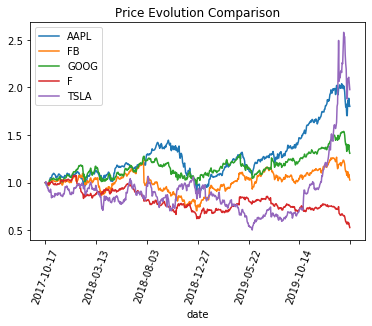

In [12]:
import requests
import pandas as pd
import matplotlib.pyplot as plt



companies = ['AAPL','FB','GOOG','F','TSLA']
listofdf = []
for item in companies:
    histprices = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{item}?serietype=line")
    histprices = histprices.json()

#Parse the API response and select only last 600 days of prices
    histprices = histprices['historical'][-600:]

#Convert from dict to pandas datafram

    histpricesdf = pd.DataFrame.from_dict(histprices)

#rename column
    histpricesdf = histpricesdf.rename({'close': item}, axis=1)
    
#append all dfs to list
    listofdf.append(histpricesdf)

#set index of each DataFrame by common column before concatinatinghtem
dfs = [df.set_index('date') for df in listofdf]

histpriceconcat = pd.concat(dfs,axis=1)

#divide all dataframe by first line of data to enable comparison
histpriceconcat = histpriceconcat/histpriceconcat.iloc[0]



for i, col in enumerate(histpriceconcat.columns):
    histpriceconcat[col].plot()

plt.title('Price Evolution Comparison')

plt.xticks(rotation=70)
plt.legend(histpriceconcat.columns)
plt.savefig('foo1.png', bbox_inches='tight')

## Setting up our Python for Finance Script
In order to start building our Stock Price Trend Analysis script, we need to import a few packages.
First, we will make http requests to a free Financial API where we will get stock daily prices. Then, we will use Pandas to consolidate the API returned financials and merge them into a single Pandas DataFrame. Last, we will use matplotlib to convert our data into a graph.
After importing all required packages, we will have a list of stock tickers for each of the companies that we want to retrieve prices for. As an idea, you could also get, using Python, a list of tickets of all companies in the S&P 500 index and use it as a base for your analysis instead of entering the tickers manually. You can find out how in one of my other articles.

In [13]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

#Enter the ticker of the companies that you want to analyse
companies = ['AAPL','FB','GOOG','F','TSLA']
#empty list to add each of the companies
listofdf = []

Now that we have the initial setup, we can move to the fun part. Our intial goal is to send an http request to the API end point to download daily stock prices.

In [14]:
#API end point request
stock=requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/aapl?serietype=line")
stock=pd.DataFrame(stock)
stock

0
0     b'{\n  "symbol" : "AAPL",\n  "historical" : [ ...
1     b'"close" : 1.59\n  }, {\n    "date" : "1989-0...
2     b'  "date" : "1989-09-25",\n    "close" : 1.62...
3     b'",\n    "close" : 1.6\n  }, {\n    "date" : ...
4     b' }, {\n    "date" : "1989-10-02",\n    "clos...
...                                                 ...
3205  b'020-02-21",\n    "close" : 313.05\n  }, {\n ...
3206  b'lose" : 288.08\n  }, {\n    "date" : "2020-0...
3207  b', {\n    "date" : "2020-02-28",\n    "close"...
3208  b'2020-03-03",\n    "close" : 289.32\n  }, {\n...
3209  b'close" : 292.92\n  }, {\n    "date" : "2020-...

[3210 rows x 1 columns]

In [15]:
for item in companies:
    histprices = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{item}?serietype=line")
#convert response to json
    histprices = histprices.json()

#Parse the API response and select only last 600 days of prices
    histprices = histprices['historical'][-600:]

#Convert from dict to pandas datafram
    histpricesdf = pd.DataFrame.from_dict(histprices)

#rename column from close to the name of the company
    histpricesdf = histpricesdf.rename({'close': item}, axis=1)
    
#append all dfs to list
    listofdf.append(histpricesdf)

## A For loop will let us iterate through each of the companies that we have in our companies list. That way, in each loop iteration we will make a new http request for each of the stocks included in the list.
Note that we pass as a parameter of the url the word item which represents the stock ticker and will change with each loop iteration.
Then, we slice the Pandas DataFrame to keep only the latest 600 days. Finally, we can use pd.DataFrame.from_dict() to convert our dictionary with the stock prices and dates into a Pandas DataFrame.
Now we have a list call listofdf. Each of the element in the list contains a Pandas DataFrame for each of the stocks. However, having all our stocks in separate Pandas DataFrames is not very helpful for our analysis. Therefore, we are going to merge them into one using the Pandas class method pd.concat.

In [16]:
#set index of each DataFrame by common column before concatinatinghtem
dfs = [df.set_index('date') for df in listofdf]

histpriceconcat = pd.concat(dfs,axis=1)
histpriceconcat

AAPL      FB     GOOG      F    TSLA
date                                              
2017-10-17  160.47  176.11   992.18  12.27  355.75
2017-10-18  159.76  176.03   992.81  12.19  359.65
2017-10-19  155.98  174.56   984.45  12.23  351.81
2017-10-20  156.25  174.98   988.20  12.10  345.10
2017-10-23  156.17  171.27   968.45  12.04  337.02
...            ...     ...      ...    ...     ...
2020-03-02  298.81  196.44  1389.11   7.20  743.62
2020-03-03  289.32  185.89  1341.39   6.97  745.51
2020-03-04  302.74  191.76  1386.52   7.08  749.50
2020-03-05  292.92  185.17  1319.04   6.74  724.54
2020-03-06  289.03  181.09  1298.41   6.49  703.48

[600 rows x 5 columns]

Great, now we have all stock prices merged in a single Pandas DataFrame:
As the last step before starting plotting the price trend for each of the stocks, we will divide each of the rows in the DataFrame by the first row. This will enable comparison across stocks since all stock prices will be shown as a percentage difference over time.

## Plotting Stock Price Trends
Our script is almost ready, the only part pending is the Python graph showing the stock price trend over time. We can easily achieve this using matplotlib.
First, we will loop through each of our concatenated Pandas DataFrame in order to plot each of the columns. Then, we can change a bit the layout of the graph by adding a title, rotating the sticks and displaying a legend:

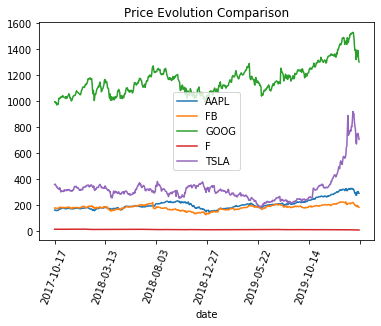

In [17]:
for i, col in enumerate(histpriceconcat.columns):
    histpriceconcat[col].plot()

plt.title('Price Evolution Comparison')

plt.xticks(rotation=70)
plt.legend(histpriceconcat.columns)

#Saving the graph into a JPG file
plt.savefig('foo1.png', bbox_inches='tight')

# Visualizing Free Stock Data for Algorithmic Trading with Python and Matplotlib

## Technical Analysis
Technical analysis is a method of analyzing stock data in order to make educated predictions on price trends and movements. When juxtaposed with fundamental analysis, technical analysis lives within charts, and it breaths with statistics. Both technical and fundamental analysis can be used when evaluating a stock, and each method has its own strengths.
The goal of technical analysis is to provide some sort of insight into future price movement. There are a surplus of different types of charts and statistics that offer valuable information in reference to support, resistance, signals, and trends. In this article, I focus solely on two indicators, moving averages and Bollinger Bands. In later articles, I aim to develop a trading strategy involving technical analysis.
## Setup
To setup the environment properly, you will also need to install pandas, datetime, and matplotlib by running: pip install pandas datetime matplotlib.

## Pulling Historical Prices
I chose to analyze the Disney stock price over the past two years. Disney has been in the news frequently and the stock price has seen massive swings over the course of two years, so the choice was made for the purpose of visualization.
The IEX API requires datetime dates to pull historical prices. In the lines below, I initialize the date range and request the output to be formatted to a pandas DataFrame.

## Initial Plot
If you have read any of my other articles, the steps to this point should have been second nature. Pandas has built in support for matplotlib, so plotting the historical prices is incredibly easy. Below, I plot the historical price of Disney stock:

## … on to the Good Part
Although plotting the historical prices can be seen as an achievement, analysis is limited with one feature. As promised, I will now demonstrate how to add statistics to the chart, for the development of a more informed trading strategy.

## Moving Averages
The first new feature I will plot is a moving average. A moving average is an indicator that smooths the volatility of daily price changes. A technical analyst chooses a window for the average and a corresponding dataset is computed.
There are different types of moving averages, but the most common is the simple moving average. A simple moving average is the arithmetic mean over a number of specific time periods (the window) [1]. The window can be arbitrarily chosen, but there are recommendations on which window to use and how many to use.
Another common form of moving average is the exponential moving average. The formula for calculating the exponential moving average is a little more complex, but its goal is to further smooth out the noise of daily price changes.
Pandas makes it incredibly easy to add new columns to a DataFrame, so adding the moving average is a breeze. Below, I add two more columns to the DataFrame — one for a moving average of 50 days, and another for a moving average of 200 days:

## Are the Lines Supposed to Cross?
Aha! If you are paying attention and have been following along, you may have noticed that the line for the 50-day simple moving average and the line for the 200-day moving average cross. The crossover of the two moving averages forms the basis of the moving average crossover trading strategy.
The crossover of the two lines signals that it may be smart to take a certain position. Typically, when the shorter term moving average crosses above the longer moving average, it is an indication to buy. If the shorter term moves below the long term, it is an indication to sell. In the future, I will use Quantopian to implement a moving average crossover trading strategy, but hold your horses for now.
If you can’t hold your horses and want a little more code to play around with, check out the snippet below to add the 20-day exponential moving average to the chart.

## Bollinger Bands
Next up, we have Bollinger Bands. Trading with Bollinger Bands can be a little harder to conceptualize. There are three different Bollinger Bands:

1. Middle Band= 20-day simple moving average (SMA)
2. Upper Band= 20-day SMA+(20-day standard deviation of price x 2)
3. Lower Band= 20-day SMA–(20-day standard deviation of price x 2)

Bollinger Bands illustrate the relative strength or momentum of a stock [2]. Bollinger Bands act as an envelope around the price of a stock. The bands are more complicated, but they provide more insight than just using the moving average. Below, I create the three bands as new entries in the DataFrame.

## Confused???
At first, visualizing the Bollinger Bands provides seems confusing and overcrowded. Typically, when the price of the stock is considered relatively low (attractive), it is near the lower band, and if the stock is relatively high (overvalued), it’s near the upper band. Since the bands are an assessment of strength, the bands are often used with another indicator, to make an informed decision about a position.

## Making Sense Now?
Bollinger Bands are also a great indicator into the volatility of a stock. If you refer to the previous chart, the Disney stock price skyrockets around April 2019.

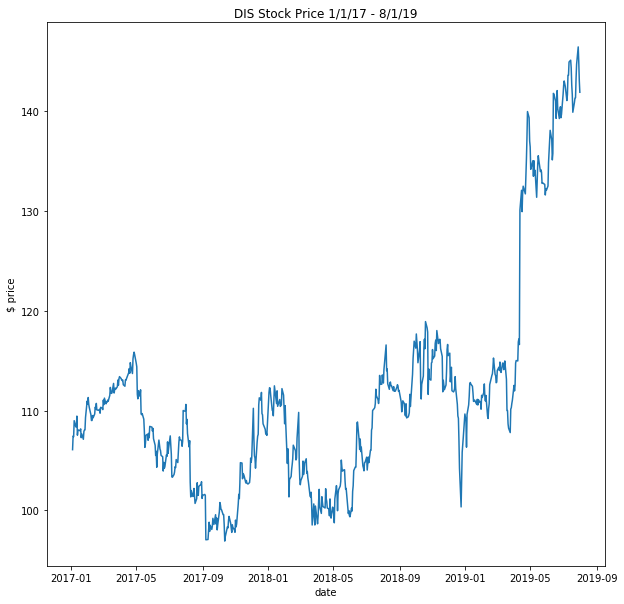

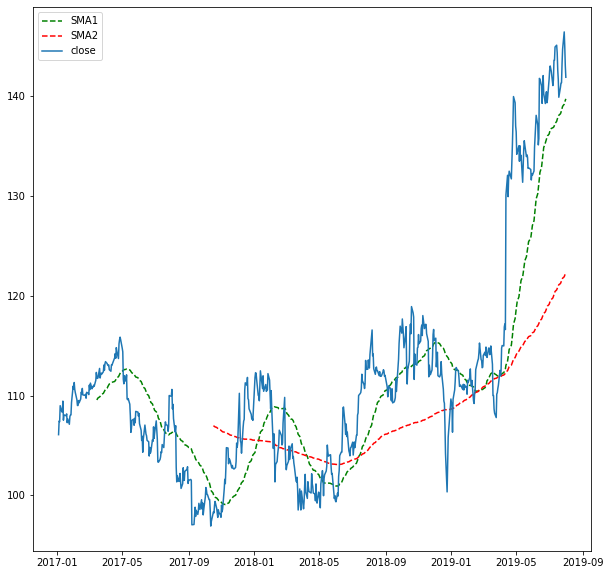

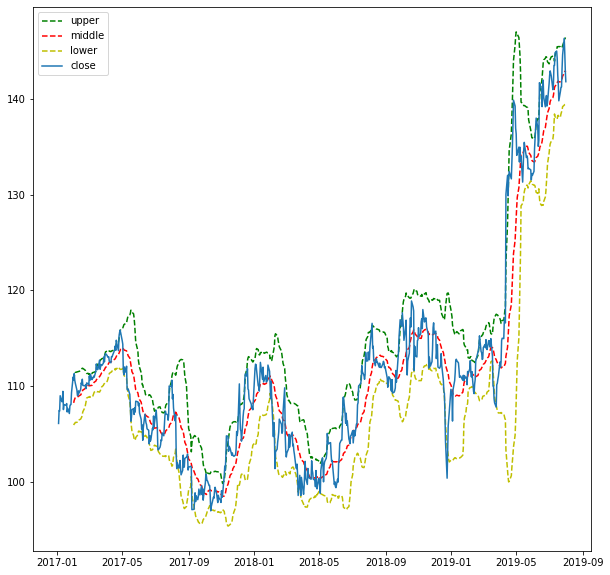

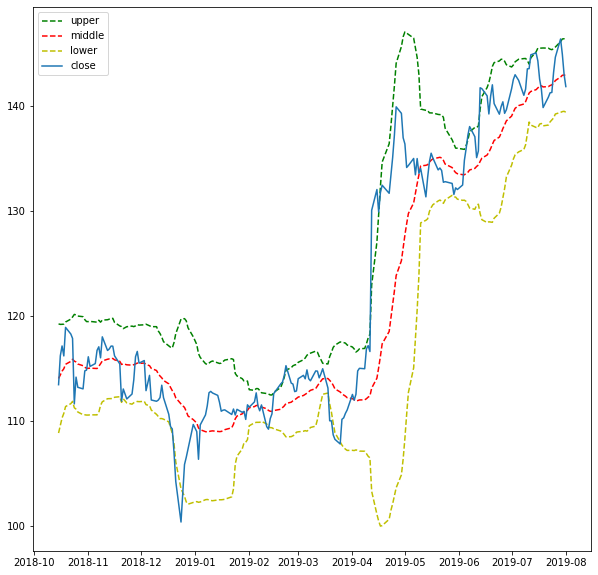

In [18]:
    # Imports
    
import pandas as pd
from iexfinance.stocks import Stock
from datetime import datetime
import matplotlib.pyplot as plt
from iexfinance.stocks import get_historical_data

    # Pulling and Plotting Historical Prices
    
start = datetime(2017, 1, 1)
end = datetime(2019, 8, 1)
df = get_historical_data("DIS", start, end, output_format='pandas',token = 'pk_b740ad24ded147cca822e98ded174c3d')
plt.figure(figsize=(10,10))
plt.plot(df.index, df['close'])
plt.xlabel("date")
plt.ylabel("$ price")
plt.title("DIS Stock Price 1/1/17 - 8/1/19")
    
    # Creating and Plotting Moving Averages
    
df["SMA1"] = df['close'].rolling(window=50).mean()
df["SMA2"] = df['close'].rolling(window=200).mean()
df['ewma'] = df['close'].ewm(halflife=0.5, min_periods=20).mean()
plt.figure(figsize=(10,10))
plt.plot(df['SMA1'], 'g--', label="SMA1")
plt.plot(df['SMA2'], 'r--', label="SMA2")
plt.plot(df['close'], label="close")
plt.legend()
plt.show()
    
    # Creating and Plotting Bollinger Bands
    
df['middle_band'] = df['close'].rolling(window=20).mean()
df['upper_band'] = df['close'].rolling(window=20).mean() + df['close'].rolling(window=20).std()*2
df['lower_band'] = df['close'].rolling(window=20).mean() - df['close'].rolling(window=20).std()*2
plt.figure(figsize=(10,10))
plt.plot(df['upper_band'], 'g--', label="upper")
plt.plot(df['middle_band'], 'r--', label="middle")
plt.plot(df['lower_band'], 'y--', label="lower")
plt.plot(df['close'], label="close")
plt.legend()
plt.show()
plt.figure(figsize=(10,10))
plt.plot(df['upper_band'].iloc[-200:], 'g--', label="upper")
plt.plot(df['middle_band'].iloc[-200:], 'r--', label="middle")
plt.plot(df['lower_band'].iloc[-200:], 'y--', label="lower")
plt.plot(df['close'].iloc[-200:], label="close")
plt.legend()
plt.show()

# Free Financial Stock Data for Python Using IEX API

## Why IEX?
Getting key financial data has become increasingly harder since the restrictions placed on the Yahoo and Google Finance APIs. Currently, there are a multitude of services that offer financial data, but finding a viable free candidate is still challenging.
IEX is a phenomenal company that was founded in 2012 with the goal of reshaping the fintech landscape. The company mission is based off the premise that the market should be fair to all investors. As someone relatively new to the investing and trading space, I find this message particularly appealing.
On their website, IEX has a whole section dedicated to developers. The free version of their API is very generous and integrates very well with Python. The API calls are limited due to a message system and each call holds a certain weight, but none of the calls are off limits. At the free tier, you get 500,000 messages which is enough to pull data from multiple companies. Personally, I look at the restriction as a benefit, encouraging more efficient code and reason to develop a more focused strategy.

## Getting Started
In order to use IEX, you need an account. The signup is relatively quick, but it is necessary in order to get an API key so you can make calls. The next step in the process is to download the PyPI IEX Finance module.
In order to install, run: pip install iexfinance.
We are going to be working with the list of companies on the S&P 500. In one of my previous stories, I demonstrate how to automate the process of getting the companies listed in the S&P 500.

## Setup
In order to run the rest of the code properly, you will also need to install pandas, datetime, and matplotlib by running: pip install pandas datetime matplotlib.

## Getting Company Info
In order to get information like “company name”, “CEO”, “Sector” and “Industry” we will be hitting the IEX /company endpoint.
To access the method, we first need to create a Stock object. IEX allows you to instantiate 100 stocks at a time and hit a ton of different endpoints. We will complete all of the previously mentioned steps in the function below.

## Getting Company Earnings
Getting the earnings follows a very similar process as getting the company info. In this example we will only be getting the earning of the last four quarters of a single company, 3M. We will be eating the IEX /earnings endpoint.
To get the earnings of a single company use the function below. The function returns a report object for each quarter contained within a list.

## Getting and Graphing Historical Prices
Obtaining historical stock price information is obviously a necessary task for any trading application. IEX provides a couple different methods to get historical price info. In this example, we will use get_historical_data() since the documentation states that it optimizes message usage.
Calling the endpoint to get historical data is a little different than the other calls. Getting historical data requires the import of top-level functions, so no Stock object instantiation is needed.
For this example we will be pulling all the price data for 3M stock from Jan 1, 2016 until July 30,2019. Since we used the output_format='pandas’ our data will automatically be returned in a DataFrame object. To get the historical data for a specified range use the function below:

## Wrap Up
That should be enough to get started with the IEX API. Do not forget about message counts. There are parts of the API that are a little confusing, specifically when dealing with time series data. In the next stores, we will evaluate better options for getting historical prices. Thank you for reading!

## 5 Lines of Python to Automate Getting the S&P 500

## Full Code

## Why You Need This
Most of the tutorials relating to grabbing stock data involve the Yahoo or Google Finance APIs. Both APIs no longer allow access, which makes getting the initial data difficult.
Pulling the list of companies listed in the S&P 500 is important for analysis because it can be used as a benchmark for comparing other trading strategies. Since the S&P 500 offers an annualized return of around 10%, the value of a trading strategy (alpha) can be measured in comparison.

## What We Are Doing
Today, we will be pulling a regularly updated list of all companies currently listed in the S&P 500. The S&P 500 is an index consisting of the largest companies by market cap listed on the NYSE, NASDAQ, and the Cboe BZX Exchanges. Although there are several other indices, the S&P 500 is usually referenced to describe the current state of the United States Stock Market.

## How We Will Do It
The only dependency for running this script is Pandas. The Pandas library is an essential data analysis tool. As I continue to publish stories, Pandas will most likely be a reoccurring dependency due to its incredible data manipulation and analysis features.
In terms of the code, we begin by importing pandas. Next, we use the pandas read_html() function to scrape the wikipedia page relating to the S&P 500. The read_html() functions returns a list of DataFrame objects. Since we are only interested in the current list of stocks in the S&P 500, we only need the DataFrame object at index 0. Finally, we use the pandas function to_csv() to export the full table and a list of just the symbols our project directory.
It’s that easy! View the code below:

In [19]:
import pandas as pd
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df.to_csv('S&P500-Info.csv')
df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])

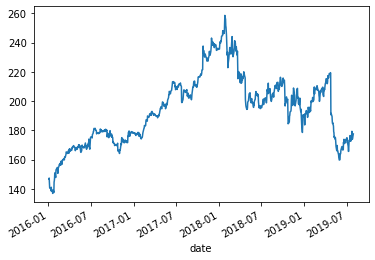

In [20]:
import pandas as pd
from iexfinance.stocks import Stock
from datetime import datetime
import matplotlib.pyplot as plt
from iexfinance.stocks import get_historical_data

def getCompanyInfo(symbols):
    stock_batch = Stock(symbols,
                        token = 'pk_b740ad24ded147cca822e98ded174c3d')
    company_info = stock_batch.get_company()
    return company_info
def getEarnings(symbol):
    stock_batch = Stock(symbol,
                        token = 'pk_b740ad24ded147cca822e98ded174c3d')
    earnings = stock_batch.get_earnings(last=4)
    return earnings
def getHistoricalPrices(stock):
    return get_historical_data(stock, start, end, 
                               output_format='pandas', 
                               token = 'pk_b740ad24ded147cca822e98ded174c3d')


sp = pd.read_csv('S&P500-Symbols.csv', index_col=[0])
sp_company_info = getCompanyInfo(sp["Symbol"][:5].tolist())
company_info_to_df = []
for company in sp_company_info:
    company_info_to_df.append(sp_company_info[company])
columns = ['symbol', 'companyName', 'exchange',
           'industry', 'website', 'CEO', 'sector']
df = pd.DataFrame(company_info_to_df, columns=columns )
df.head()
single_stock_earnings = getEarnings(sp["Symbol"][0])
df_earnings = pd.DataFrame(single_stock_earnings)
df_earnings.head()
start = datetime(2016, 1, 1)
end = datetime(2019, 7, 30)
single_stock_history = getHistoricalPrices(sp["Symbol"][0])
single_stock_history['close'].plot(label="3M Close")

# The Complete Guide to Time Series Analysis and Forecasting


* Understand moving average, exponential smoothing, stationarity, autocorrelation, SARIMA, and apply these techniques in two projects.
- https://github.com/marcopeix/stock-prediction/blob/master/Stock%20Prediction.ipynb

## ...
Whether we wish to predict the trend in financial markets or electricity consumption, time is an important factor that must now be considered in our models. For example, it would be interesting to forecast at what hour during the day is there going to be a peak consumption in electricity, such as to adjust the price or the production of electricity.
Enter time series. A time series is simply a series of data points ordered in time. In a time series, time is often the independent variable and the goal is usually to make a forecast for the future.
However, there are other aspects that come into play when dealing with time series.
Is it stationary?
Is there a seasonality?
Is the target variable autocorrelated?
In this post, I will introduce different characteristics of time series and how we can model them to obtain accurate (as much as possible) forecasts.

## Autocorrelation
- Informally, autocorrelation is the similarity between observations as a function of the time lag between them.

- Above is an example of an autocorrelation plot. Looking closely, you realize that the first value and the 24th value have a high autocorrelation. Similarly, the 12th and 36th observations are highly correlated. This means that we will find a very similar value at every 24 unit of time.

- Notice how the plot looks like sinusoidal function. This is a hint for seasonality, and you can find its value by finding the period in the plot above, which would give 24h.


## Seasonality
- Seasonality refers to periodic fluctuations. For example, electricity consumption is high during the day and low during night, or online sales increase during Christmas before slowing down again.

- As you can see above, there is a clear daily seasonality. Every day, you see a peak towards the evening, and the lowest points are the beginning and the end of each day.

- Remember that seasonality can also be derived from an autocorrelation plot if it has a sinusoidal shape. Simply look at the period, and it gives the length of the season.

## Stationarity
- Stationarity is an important characteristic of time series. A time series is said to be stationary if its statistical properties do not change over time. In other words, it has constant mean and variance, and covariance is independent of time.

- Looking again at the same plot, we see that the process above is stationary. The mean and variance do not vary over time.

- Often, stock prices are not a stationary process, since we might see a growing trend, or its volatility might increase over time (meaning that variance is changing).
- Ideally, we want to have a stationary time series for modelling. Of course, not all of them are stationary, but we can make different transformations to make them stationary.

## How to test if a process is stationary
- You may have noticed in the title of the plot above Dickey-Fuller. This is the statistical test that we run to determine if a time series is stationary or not.

- Without going into the technicalities of the Dickey-Fuller test, it test the null hypothesis that a unit root is present.
- If it is, then p > 0, and the process is not stationary.
- Otherwise, p = 0, the null hypothesis is rejected, and the process is considered to be stationary.
- As an example, the process below is not stationary. Notice how the mean is not constant through time.

## Modelling time series
There are many ways to model a time series in order to make predictions. Here, I will present:
- moving average
- exponential smoothing
- ARIMA

## Moving average
- The moving average model is probably the most naive approach to time series modelling. This model simply states that the next observation is the mean of all past observations.
- Although simple, this model might be surprisingly good and it represents a good starting point.
- Otherwise, the moving average can be used to identify interesting trends in the data. We can define a window to apply the moving average model to smooth the time series, and highlight different trends.
- In the plot above, we applied the moving average model to a 24h window. The green line smoothed the time series, and we can see that there are 2 peaks in a 24h period.
- Of course, the longer the window, the smoother the trend will be. Below is an example of moving average on a smaller window.

## Exponential smoothing
- Exponential smoothing uses a similar logic to moving average, but this time, a different decreasing weight is assigned to each observations. In other words, less importance is given to observations as we move further from the present.
- Mathematically, exponential smoothing is expressed as:

- Here, alpha is a smoothing factor that takes values between 0 and 1. It determines how fast the weight decreases for previous observations.

- From the plot above, the dark blue line represents the exponential smoothing of the time series using a smoothing factor of 0.3, while the orange line uses a smoothing factor of 0.05.
- As you can see, the smaller the smoothing factor, the smoother the time series will be. This makes sense, because as the smoothing factor approaches 0, we approach the moving average model.

## Double exponential smoothing
- Double exponential smoothing is used when there is a trend in the time series. In that case, we use this technique, which is simply a recursive use of exponential smoothing twice.
- 

## Tripe exponential smoothing
This method extends double exponential smoothing, by adding a seasonal smoothing factor. Of course, this is useful if you notice seasonality in your time series.

## Seasonal autoregressive integraded moving average model (SARIMA)
- SARIMA is actually the combination of simpler models to make a complex model that can model time series exhibiting non-stationary properties and seasonality.
- At first, we have the autoregression model AR(p). This is basically a regression of the time series onto itself. Here, we assume that the current value depends on its previous values with some lag. It takes a parameter p which represents the maximum lag. To find it, we look at the partial autocorrelation plot and identify the lag after which most lags are not significant.
- Then, we add the moving average model MA(q). This takes a parameter q which represents the biggest lag after which other lags are not significant on the autocorrelation plot.
- After, we add the order of integration I(d). The parameter d represents the number of differences required to make the series stationary.
- Finally, we add the final component: seasonality S(P, D, Q, s), where s is simply the season’s length. Furthermore, this component requires the parameters P and Q which are the same as p and q, but for the seasonal component. Finally, D is the order of seasonal integration representing the number of differences required to remove seasonality from the series.
- Combining all, we get the SARIMA(p, d, q)(P, D, Q, s) model.
- The main takeaway is: before modelling with SARIMA, we must apply transformations to our time series to remove seasonality and any non-stationary behaviors.
- That was a lot of theory to wrap our head around! Let’s apply the techniques discussed above in our first project.
- We will try to predict the stock price of a specific company. Now, predicting the stock price is virtually impossible. However, it remains a fun exercise and it will be a good way to practice what we have learned.

## Project 1 — Predicting stock price
We will use the historical stock price of the New Germany Fund (GF) to try to predict the closing price in the next five trading days.
You can grab the dataset and notebook here.
As always, I highly recommend you code along! Start your notebook, and let’s go!

In [4]:
from datetime import datetime
from iexfinance.stocks import get_historical_data

start = datetime(2017, 1, 1)
end = datetime(2018, 1, 1)

df = wb.DataReader('TSLA','yahoo', start, end)
df=pd.DataFrame(df)

df.to_csv(r'C:/Users/gordo/Programming/Data_Bank/medium/stock_prices_sample.csv',  index='Date')
df

High         Low        Open       Close    Volume  \
Date                                                                   
2017-01-03  220.330002  210.960007  214.860001  216.990005   5923300   
2017-01-04  228.000000  214.309998  214.750000  226.990005  11213500   
2017-01-05  227.479996  221.949997  226.419998  226.750000   5911700   
2017-01-06  230.309998  225.449997  226.929993  229.009995   5527900   
2017-01-09  231.919998  228.000000  228.970001  231.279999   3979500   
...                ...         ...         ...         ...       ...   
2017-12-26  323.940002  316.579987  323.829987  317.290009   4378400   
2017-12-27  317.679993  310.750000  316.000000  311.640015   4712100   
2017-12-28  315.820007  309.540009  311.750000  315.359985   4316300   
2017-12-29  316.410004  310.000000  316.179993  311.350006   3777200   
2018-01-02  322.109985  311.000000  312.000000  320.529999   4352200   

             Adj Close  
Date                    
2017-01-03  216.990005  
2017-01-04  226.990005  
2017-01-05  226.750000  
2017-01-06  229.009995  
2017-01-09  231.279999  
...                ...  
2017-12-26  317.290009  
2017-12-27  311.640015  
2017-12-28  315.359985  
2017-12-29  311.350006  
2018-01-02  320.529999  

[252 rows x 6 columns]

In [5]:
    # IMPORT AND CLEAN DATA

    
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
    
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product

def mean_absolute_percentage_error(y_true, y_pred):
        return np.mean(np.abs((y_true - y_pred) / y_true))

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

DATAPATH = r'C:/Users/gordo/Programming/Data_Bank/medium/stock_prices_sample.csv'

data = pd.read_csv(DATAPATH)
data.head(10)

Date        High         Low        Open       Close    Volume  \
0  2017-01-03  220.330002  210.960007  214.860001  216.990005   5923300   
1  2017-01-04  228.000000  214.309998  214.750000  226.990005  11213500   
2  2017-01-05  227.479996  221.949997  226.419998  226.750000   5911700   
3  2017-01-06  230.309998  225.449997  226.929993  229.009995   5527900   
4  2017-01-09  231.919998  228.000000  228.970001  231.279999   3979500   
5  2017-01-10  232.000000  226.889999  232.000000  229.869995   3660000   
6  2017-01-11  229.979996  226.679993  229.070007  229.729996   3650800   
7  2017-01-12  230.699997  225.580002  229.059998  229.589996   3790200   
8  2017-01-13  237.850006  229.589996  230.000000  237.750000   6093000   
9  2017-01-17  239.960007  234.369995  236.699997  235.580002   4617500   

    Adj Close  
0  216.990005  
1  226.990005  
2  226.750000  
3  229.009995  
4  231.279999  
5  229.869995  
6  229.729996  
7  229.589996  
8  237.750000  
9  235.580002

In [6]:
data.shape

(252, 7)

In [7]:
data.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [8]:
# drop_cols = ['ADJ_CLOSE', 'ADJ_LOW', 'ADJ_HIGH', 'ADJ_OPEN', 'VOLUME', 'FREQUENCY', 'TYPE', 'FIGI']
# data.drop(drop_cols, axis=1, inplace=True)

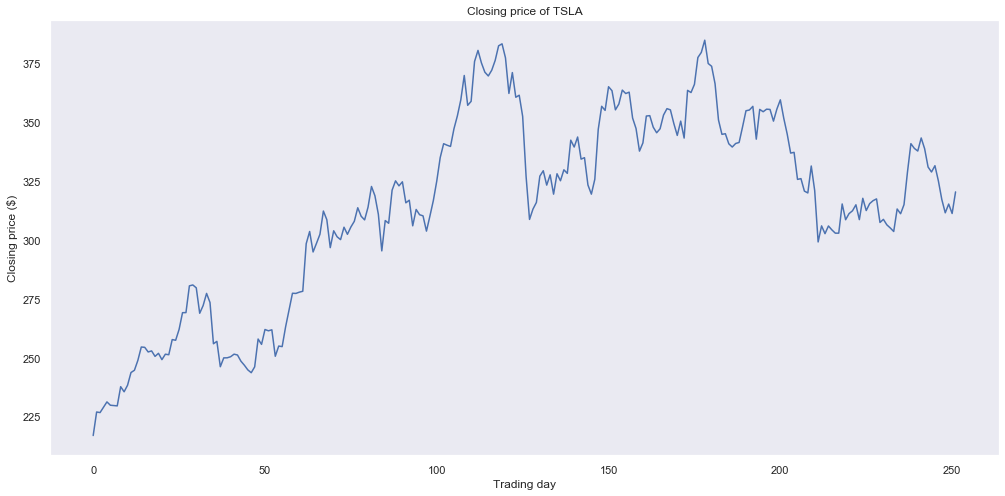

In [9]:
plt.figure(figsize=(17, 8))
plt.plot(data.Close)
plt.title('Closing price of TSLA')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [10]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)

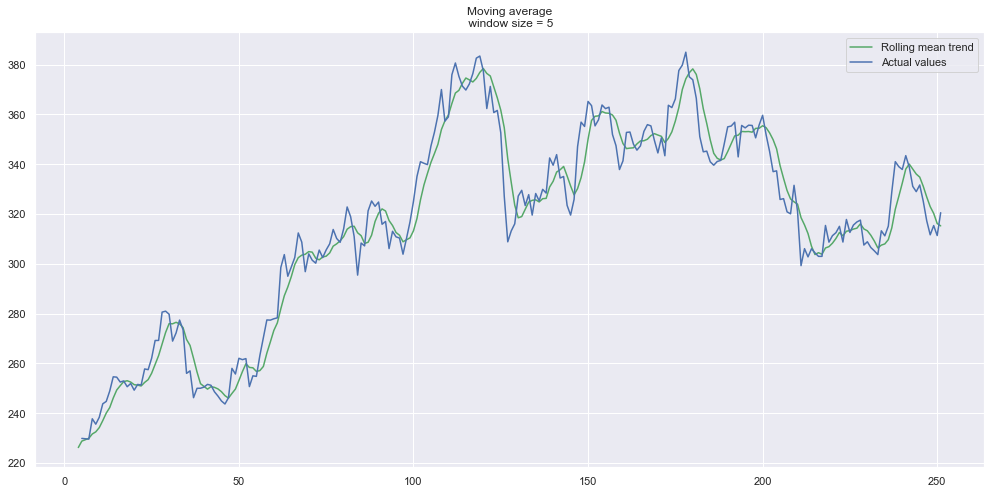

In [11]:
#Smooth by the previous 5 days (by week)
plot_moving_average(data.Close, 5)

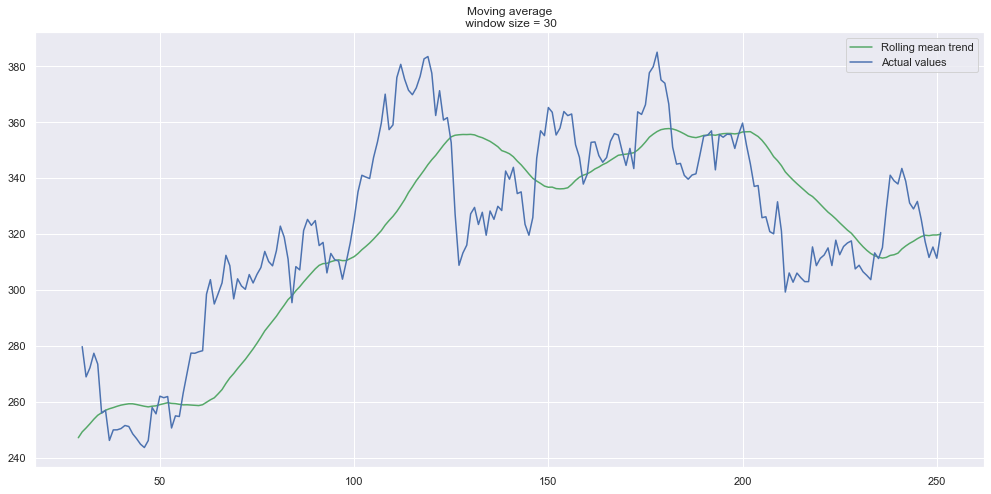

In [12]:
    #Smooth by the previous month (30 days)
    
plot_moving_average(data.Close, 30)

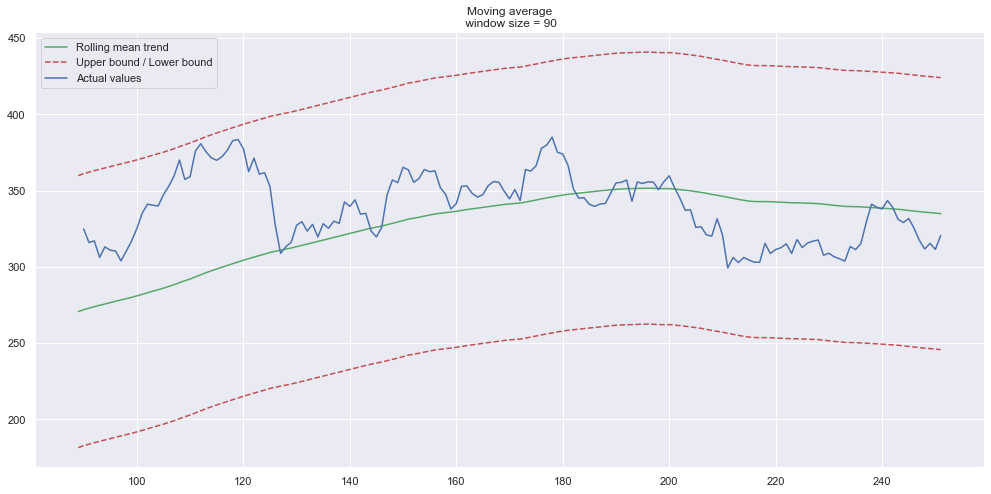

In [13]:
    #Smooth by previous quarter (90 days)
    
plot_moving_average(data.Close, 90, plot_intervals=True)

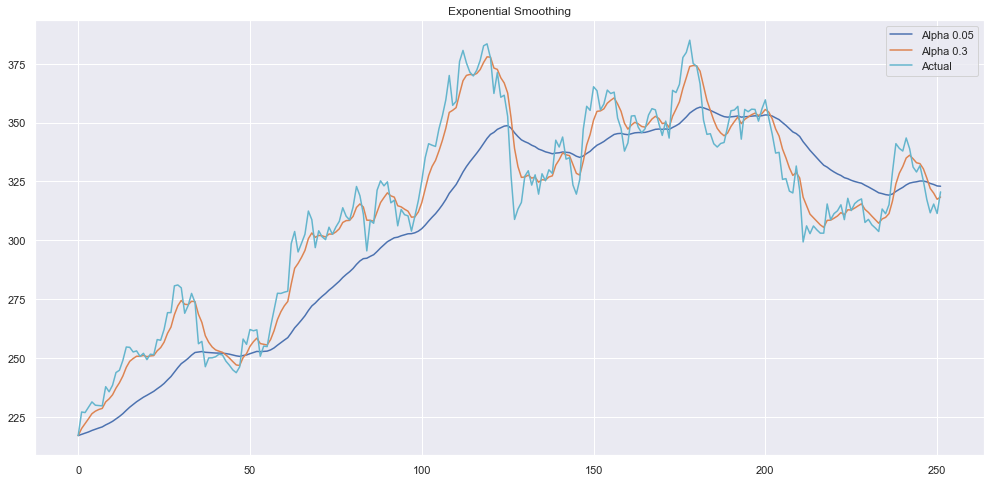

In [14]:
def exponential_smoothing(series, alpha):

    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result


def plot_exponential_smoothing(series, alphas):
 
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Exponential Smoothing")
    plt.grid(True);
    
    
plot_exponential_smoothing(data.Close, [0.05, 0.3])

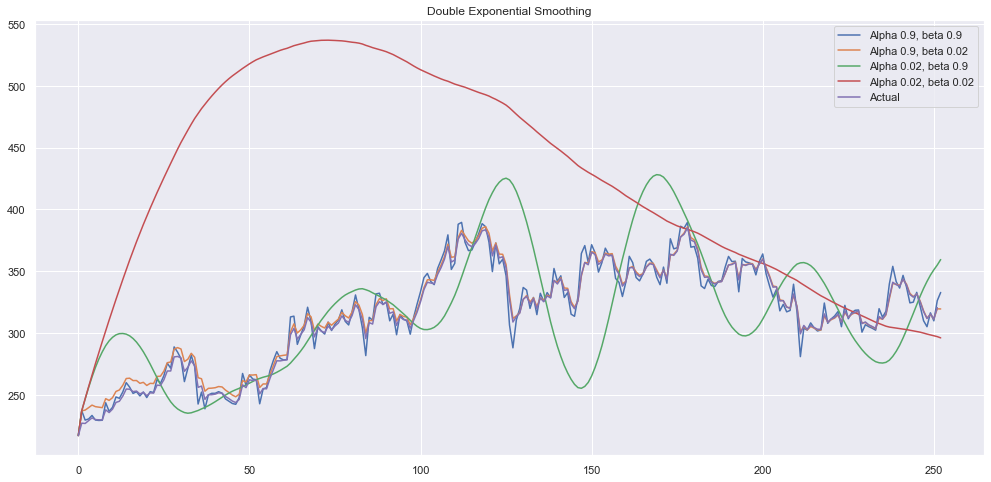

In [15]:
def double_exponential_smoothing(series, alpha, beta):

    result = [series[0]]
    for n in range(1, len(series)+1):
        if n == 1:
            level, trend = series[0], series[1] - series[0]
        if n >= len(series): # forecasting
            value = result[-1]
        else:
            value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    return result


def plot_double_exponential_smoothing(series, alphas, betas):
     
    plt.figure(figsize=(17, 8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exponential_smoothing(series, alpha, beta), label="Alpha {}, beta {}".format(alpha, beta))
    plt.plot(series.values, label = "Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title("Double Exponential Smoothing")
    plt.grid(True)
    
plot_double_exponential_smoothing(data.Close, alphas=[0.9, 0.02], betas=[0.9, 0.02])

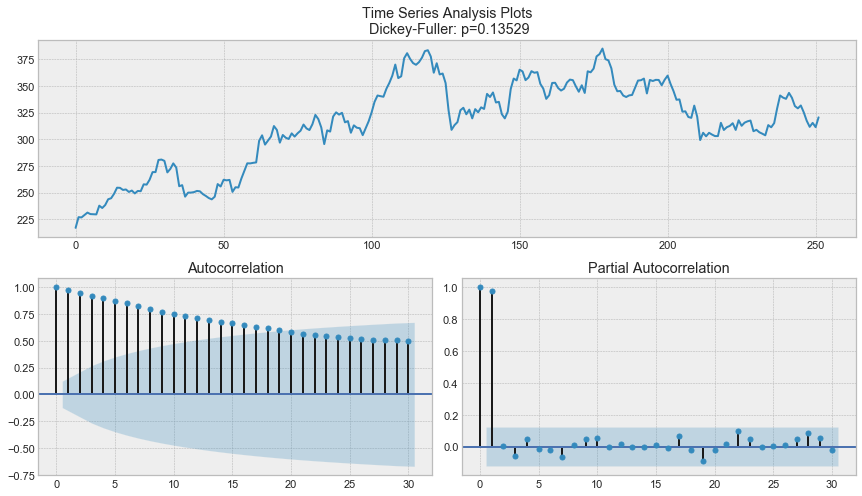

In [16]:
def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(data.Close, lags=30)

# Analysis of Stock Market Cycles with fbprophet package in Python
## stock market cycles 
* are the long-term price patterns of stock markets and are often associated with general business cycles. They are key to technical analysis where the approach to investing is based on cycles or repeating price patterns. If we have better understanding toward the cycles of stock market, we can always buy with relative low-price and sell at relative high price in each cycle, and we’ll always have positive return. What a wonderful world! Of course, there is no superior strategy in stock market which can make money forever, but fbprophet package in Python or R can help us look deeper into the hidden cycles in stock market. In this analysis, we can take a look at how fbprophet can assist us to make an investment decision, and all codes are available from here.
## Introduction to fbprophet
* Fbprophet is an open source released by Facebook in order to provide some useful guidance for producing forecast at scale. By default, it would divide a time series into trend and seasonality, which might contain yearly, weekly and daily. However, analysts can define their own seasonality. To get better understanding about the package, the document from Prophet is really helpful.
* One of the feature for package is its simplicity and flexibility. Since cycles in stock market we want to figure out are not limited to yearly, weekly or daily, we should define our own cycles and find out which can fit the data better. Besides, we should not use weekly seasonality since there is no trading on weekend. We can also define our ‘self_define_cycle’ by add_seasonality function. All the settings can be done with only two lines of code.

## REFERENCES:
* https://towardsdatascience.com/analysis-of-stock-market-cycles-with-fbprophet-package-in-python-7c36db32ecd0
* https://barrypan.github.io/Fbprophet_ANA/Final_Analysis.html

In [17]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [18]:
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error

In [19]:
# Take Costco as an example to analysis
# Using data from 2015-10-01 to 2018-03-31 as training
# Using data from 2018-04-01 to 2018-10-01 as testing for the return
ticker = "COST"
start_date = '2015-01-01'
end_date = '2020-01-01'

In [20]:
stock_data = data.DataReader(ticker, 'iex', start_date, end_date, api_key = 'pk_b740ad24ded147cca822e98ded174c3d')
print (stock_data.shape)
stock_data.head()

(1258, 5)


open    high     low   close   volume
date                                               
2015-01-02  141.87  143.15  140.81  141.61  1471736
2015-01-05  141.69  142.16  139.80  140.00  1751693
2015-01-06  140.61  142.94  139.85  141.85  3187950
2015-01-07  142.60  144.43  142.36  144.32  2171551
2015-01-08  145.56  146.10  144.94  145.56  2937674

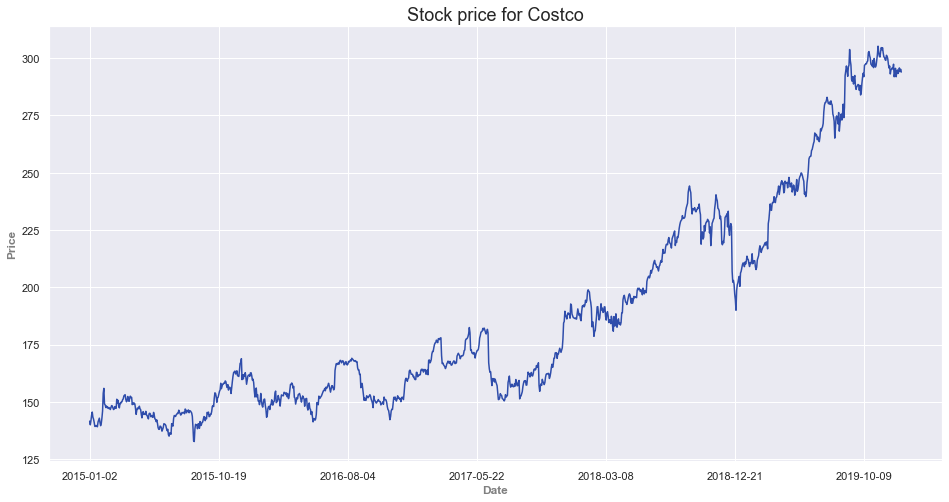

In [21]:
stock_data['close'].plot(figsize=(16,8),color='#002699',alpha=0.8)
plt.xlabel("Date",fontsize=12,fontweight='bold',color='gray')
plt.ylabel('Price',fontsize=12,fontweight='bold',color='gray')
plt.title("Stock price for Costco",fontsize=18)
plt.show()

## Summary
With the help of Python and fbprophet package, we can have better understanding toward the stock market. Taking Costco as an example, we can find a cycle with 252 days so that it can generate enough return and have a good fit of data. According to the cycle we found, we can have about 23% return for 3 years. Perhaps this investment strategy cannot satisfy what you want, but you can always set your own approaches based on your knowledge and experience. Powerful fbprophet package can make your analysis on stock market much deeper and easier.

# Simulating stock prices in Python using Geometric Brownian Motion
* A high-level description of the dynamics and the main drivers of Geometric Brownian Motion with a sample Python code

## Content
- What GBM does
- What input parameters we need for GBM simulation
- The components of GBM: Drift and Diffusion
- Building the discrete-time GBM model
- Making predictions

## FULL SYNTAX:

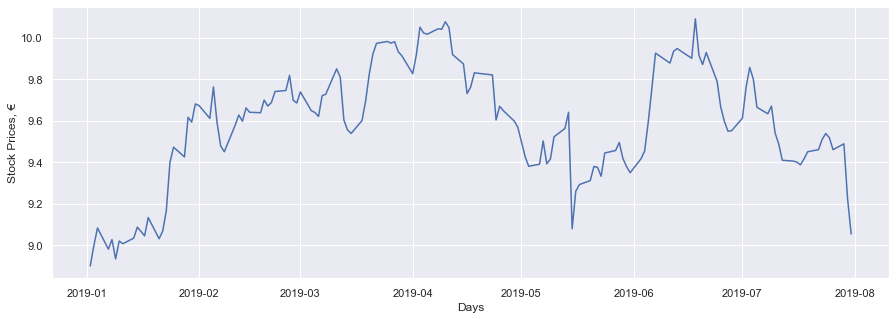

        Date  Close
0 2019-07-01  9.612
1 2019-07-02  9.761
2 2019-07-03  9.856
3 2019-07-04  9.800
4 2019-07-05  9.664
         Date  Close
18 2019-07-25  9.517
19 2019-07-26  9.460
20 2019-07-29  9.488
21 2019-07-30  9.226
22 2019-07-31  9.054
[0.015501456512692377, 0.00973260936379476, -0.005681818181818097, -0.013877551020408265, -0.0032077814569537026, 0.00384096335513348, -0.013340227507755901, -0.005554973273241884, -0.008326306913996506, -0.0004251248804337693, -0.0005316321105793732, -0.0013829787234042447, 0.0030893789283050936, 0.0036108751062020944, 0.0010582010582012237, 0.0052854122621563355, 0.002944269190326022, -0.0022017194380374075, -0.0059892823368707165, 0.0029598308668074727, -0.0276138279932545, -0.018642965532191694]
[-0.00271443 -0.00542885 -0.00814328 -0.01085771 -0.01357214 -0.01628656
 -0.01900099 -0.02171542 -0.02442985 -0.02714427 -0.0298587  -0.03257313
 -0.03528756 -0.03800198 -0.04071641 -0.04343084 -0.04614526 -0.04885969
 -0.05157412 -0.05428855 -0.05

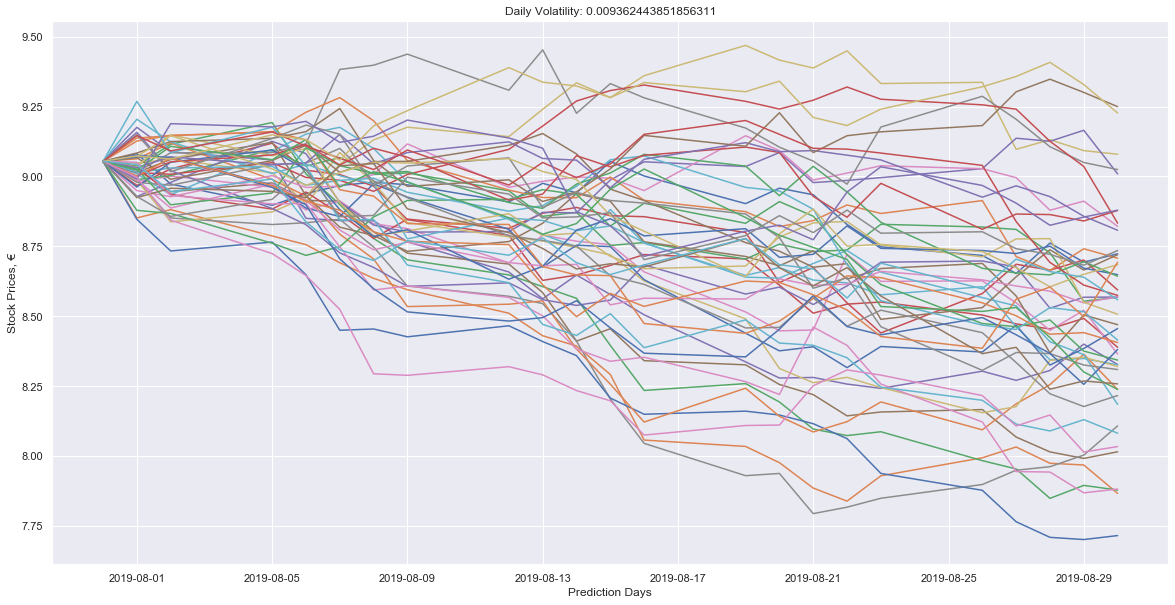

In [28]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

stock_name = 'FSE/EON_X'

# Plot of E.ON(a big scale energy company in Europe) 
#stock prices since beginning of 2019 (up to July)
prices = quandl.get(stock_name, 
                authtoken="dbyBuiq4bczbbuz9bA4t", 
                start_date = '2019-01-01', end_date = '2019-07-31'
                ).reset_index(drop = False)[['Date', 'Close']]
plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

#--------------------------------------------------- GEOMETRIC BROWNIAN MOTION ------------------------------------------------

# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in prediction the time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

start_date = '2019-07-01'
end_date = '2019-07-31'
pred_end_date = '2019-08-31'

# We get daily closing stock prices of E.ON for July 2019
S_eon = quandl.get(stock_name, 
               authtoken="dbyBuiq4bczbbuz9bA4t", 
               start_date = start_date, end_date = end_date
               ).reset_index(drop = False)[['Date', 'Close']]
print(S_eon.head())
print(S_eon.tail())

returns = (S_eon.loc[1:, 'Close'] - \
           S_eon.shift(1).loc[1:, 'Close']) / \
           S_eon.shift(1).loc[1:, 'Close']
print(returns.tolist())

# Parameter Assignments
So = S_eon.loc[S_eon.shape[0] - 1, "Close"]
dt = 1 # day   # User input
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
                 format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
                 end = pd.to_datetime(pred_end_date, 
                 format = "%Y-%m-%d")).to_series().map(lambda x: 
                 1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays # days  # User input -> follows from pred_end_date
N = T / dt
t = np.arange(1, int(N) + 1)
mu = np.mean(returns)
sigma = np.std(returns)
scen_size = 50 # User input
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}

# Calculating drift and diffusion components
drift = (mu - 0.5 * sigma**2) * t
print(drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print(diffusion)

# Making the predictions
S = np.array([So * np.exp(drift + diffusion[str(scen)]) for scen in range(1, scen_size + 1)]) 
S = np.hstack((np.array([[So] for scen in range(scen_size)]), S)) # add So to the beginning series
print(S)

# Plotting the simulations
plt.figure(figsize = (20,10))
for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = S_eon["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
plt.show()

# Dataframe format for predictions - first 10 scenarios only
Preds_df = pd.DataFrame(S.swapaxes(0, 1)[:, :10]).set_index(
           pd.date_range(start = S_eon["Date"].max(), 
           end = pred_end_date, freq = 'D').map(lambda x:
           x if x.isoweekday() in range(1, 6) else np.nan).dropna()
           ).reset_index(drop = False)

## Introduction
- It would be great if we can precisely predict how stock prices will change in near or far future. We would be rich, but it is almost impossible to create exact predictions. There are so many factors involved in the movement of stock prices that are hard to model. Human psychology is one of them. Investors, for sure, make their decisions based on empirical evidence and stock market indicators. However, they are still humans. Different people can interpret data differently, both because of their risk appetite and their mood at the moment. While a piece of breaking news in the country causes an investor to buy a stock, it causes another one to sell that same stock. Therefore, predicting stock prices is a difficult job, but we still have valuable tools which can help us to understand the stock price movement up to some point.
- In this article, we discuss how to construct a Geometric Brownian Motion(GBM) simulation using Python. While building the script, we also explore the intuition behind the GBM model. I will not be getting into the theoretical background of its derivation. It’s beyond the scope of this article. I care more about giving a high-level understanding of what GBM needs as parameters, what its components are and how it creates predictions. I will try to have a bottom-up approach and build up the logic of GBM starting from its components. The simulation model we develop here is a discrete-time model. Therefore, all mathematics discussed here is the discrete-time analogy of Geometric Brownian Motion for continuous stochastic processes. At the end of this article, we learn how to create simulations using GBM and you will have a full code.


## What GBM does
- I use E.ON’s stock prices as an example throughout the article when explaining the related concepts. E.ON is an electric utility company based in Germany and it is one of the biggest in Europe. I retrieve its stock prices(in Euros) from Xetra Exchange through Python package of Quandl. Here is a link where you can display the stock prices: Investing.com Link

- To be able to use Quandl, you need to sign up and get an authorization token from its website and also you need to install “quandl” Python package. Assuming that you completed these steps, you can just use the code below to extract stock price data.

- Geometric Brownian Motion is widely used to model stock prices in finance and there is a reason why people choose it. In the line plot below, the x-axis indicates the days between 1 Jan 2019–31 Jul 2019 and the y-axis indicates the stock price in Euros. I want you to focus only on major, longer duration trends in the plot, disregarding the small fluctuations. You would realize that the stock price follows a wavy path. It increases from January to April, then it decreases until mid-May, followed by another increase series until mid-June and finally decreasing until the end of July. Now, I want you to focus on shorter-term fluctuations. Let’s investigate July. You can say that the general trend is downward, but the stock price doesn’t just fall smoothly. During its journey to the end of July, it goes up and down continuously which indicates that there is not an interpretable pattern in this movement.

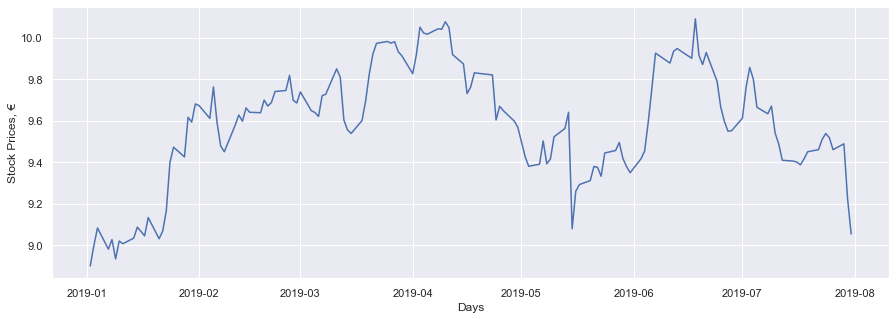

In [30]:
import pandas as pd
import numpy as np
import quandl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Plot of E.ON(a big scale energy company in Europe) 
# stock prices since beginning of 2019 (up to July)

prices = quandl.get("FSE/EON_X", 
                authtoken="dbyBuiq4bczbbuz9bA4t", 
                start_date = '2019-01-01', end_date = '2019-07-31'
                ).reset_index(drop = False)[['Date', 'Close']]
                
plt.figure(figsize = (15, 5))
plt.plot(prices['Date'], prices['Close'])
plt.xlabel('Days')
plt.ylabel('Stock Prices, €')
plt.show()

### So, we have already identified the two components of stock price movement. In July,
E.ON’s stock price tends to fall, and
There are random shocks each day to the falling stock price that result in an irregular line plot.
As a result, we need a suitable model that takes into account both types of movements in the stock price. This is where Geometric Brownian Motion comes into play. GBM has two components that do this job. One component incorporates the long-term trend while the other component applies random shocks. We will talk about these in later sections.

## 2. What input parameters we need for GBM simulation
Below are the input parameters that our GBM simulation model will take. We will discuss each of them one by one in detail. For the sake of this article, I will use E.ON’s stock prices of July to make predictions for August. Also, you should note that I talk about trading days when I explain things using dates. We assume that a week is composed of only the weekdays, meaning that what comes after Friday is Monday. So, I want you to keep these in mind while reading about the input parameters.

In [ ]:
# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in the prediction time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

### DETAILS:
- We retrieve historical stock prices between start_date and end_date. Then using our GBM model, we will get our simulations until pred_end_date. We can play with these variables and create different settings.


In [32]:
start_date = '2019-07-01'
end_date = '2019-07-31'
pred_end_date = '2019-08-31'

# We get daily closing stock prices of E.ON for July 2019
S_eon = quandl.get("FSE/EON_X", 
               authtoken="dbyBuiq4bczbbuz9bA4t", 
               start_date = start_date, end_date = end_date
               ).reset_index(drop = False)[['Date', 'Close']]
               
print(S_eon.head())
print(S_eon.tail())

        Date  Close
0 2019-07-01  9.612
1 2019-07-02  9.761
2 2019-07-03  9.856
3 2019-07-04  9.800
4 2019-07-05  9.664
         Date  Close
18 2019-07-25  9.517
19 2019-07-26  9.460
20 2019-07-29  9.488
21 2019-07-30  9.226
22 2019-07-31  9.054


### 1. So
This is the initial stock price. Forward stock price simulations take their roots from this initial stock price value. We will multiply this initial value with some expressions to get predictions for each of the trading days in August. In our case, So is the closing stock price on July 31, 2019.

In [33]:
So = S_eon.loc[S_eon.shape[0] - 1, "Close"]
print(So)

9.054


### 2. dt
This is the time increment in our model. It means the time unit that we assume. Remember that we have the closing prices of E.ON stocks for each trading day, then the time increment in our model is 1 day. Please note that dt follows from the time steps in historical data. If the stock price data is published every 7.2 hours, then dt would be 0.3 since it corresponds to 7.2 hours(= 0.3 days).

In [34]:
dt = 1
print(dt)

1


### 3. T
- T denotes the length of our prediction time horizon. We should be careful and consistent when specifying values for T and dt. For example, in our case, T should be 22 days since we want predictions for 22 trading days of August and when assigning a value to dt, following from our declaration of T, we should remember that dt must be represented in terms of days. The time unit for these two parameters has to be the same. Now, looking at a different example, suppose we have two stock price values for each trading day in our data and we know that we will make predictions for the 22 trading days in August. Under this setting, our time increment would be 0.5 days and we would assign 0.5 to dt. So, we would have 44 predictions after applying GBM, two predictions for each trading day in August.

- Remember the example in the previous part where we supposed stock price data is published every 7.2 hours. If we want our prediction time horizon to be 72 hours(T = 72), then the appropriate dt would be 7.2 hours itself, without needing to convert it to 0.3 days. So, in the end, we would have 72 / 7.2 = 10 predictions with 7.2 hours between each of them.

- If you follow this idea when building and using a GBM model, it becomes a lot easier to use your model for different equities under different settings. This feels confusing to many people and that’s why I try to standardize it like this here :) The ultimate point we are trying to reach is calculating N(explained in the next part) correctly. It is the number of time points within our prediction time horizon which should be consistent with our historical data in terms of time increment magnitude. I know it’s a simple thing, but building a line of reasoning is always a good idea to prevent potential confusions in different applications of our code in the future.
- We can infer the number of trading days in August, using the pred_end_date variable we declared at the beginning of this section. Using the code below, we can extract the number of trading days our model will predict stock prices for, by counting the weekdays between (end_date + 1 day) and pred_end_date. What we need in our case is the number of trading days between 1 Aug 2019 and 31 Aug 2019.

In [35]:
n_of_wkdays = pd.date_range(start = pd.to_datetime(end_date, 
              format = "%Y-%m-%d") + pd.Timedelta('1 days'), 
              end = pd.to_datetime(pred_end_date, 
              format = "%Y-%m-%d")).to_series(
              ).map(lambda x: 
              1 if x.isoweekday() in range(1,6) else 0).sum()
T = n_of_wkdays
print(T)

22


### 4. N
This parameter comes automatically after assignment of dt and T. It is the number of time points in the prediction time horizon. In our case, our time increment is 1 day and we will get predictions for 22 trading days. This means, we have 22 different time points(days) and we will have 22 predictions at the end.

In [36]:
N = T / dt
print(N)

22.0


### 5. t
This is an array where we show the time progression in our model. It is like a time ticker where we measure time by counting the number of time points elapsed. Building array t follows from the calculation of N. Remember we have 22 time points(days) to make predictions for. That’s why array t starts from 1 and goes up to 22. When we use an element from array t, it means, that much time point elapsed in the model. As our predictions get far away from the date of So(starting day), they will fluctuate more due to this array t with more time points getting elapsed. In our case, t would be the array below for our model.

In [37]:
t = np.arange(1, int(N) + 1)
print(t)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


### 6. mu
This is the mean return of the stock prices within the historical date range selected. In our case, we pick trading days of July as the historical data and we should calculate mu using stock prices of July. Before calculating mu, we should calculate the return for each trading day. The calculation is below.


In [38]:
returns = (S_eon.loc[1:, 'Close'] - \
          S_eon.shift(1).loc[1:, 'Close']) / \
          S_eon.shift(1).loc[1:, 'Close']
print(returns.tolist())

[0.015501456512692377, 0.00973260936379476, -0.005681818181818097, -0.013877551020408265, -0.0032077814569537026, 0.00384096335513348, -0.013340227507755901, -0.005554973273241884, -0.008326306913996506, -0.0004251248804337693, -0.0005316321105793732, -0.0013829787234042447, 0.0030893789283050936, 0.0036108751062020944, 0.0010582010582012237, 0.0052854122621563355, 0.002944269190326022, -0.0022017194380374075, -0.0059892823368707165, 0.0029598308668074727, -0.0276138279932545, -0.018642965532191694]


After calculating returns:
- for all of the days in July, we need to calculate the arithmetic average using those returns to obtain mu. We will then use mu in our drift component calculation. It will have an effect on the long-term movement of the stock price. Also, as you can see below, mu is ~ -0.3 % which indicates that there is a negative return on average during the month July and we should take into this account when calculating forward predictions for August.

In [39]:
mu = np.mean(returns)
print(mu)

-0.002670599669333055


### 7. sigma
This is the standard deviation of returns of the stock prices in July. sigma is important, because, it will be helpful to incorporate random shocks to our predictions. Remember from the line plot of E.ON stock prices above, the stock price continuously goes up and down one day to another. Also, the magnitude and direction of this small movement seem to be random. Here, sigma will help us in determining the magnitude of the movement. sigma, by itself, doesn’t add the randomness we need to the model. We will use the standard normal random variable when picking up random values. sigma will contribute by scaling the magnitude of random shock so that the small fluctuations occur in accordance with the historical volatility of the stock prices. We don’t want any irrelevant random values coming from the standard normal distribution. Below, you can see how sigma is calculated.

In [40]:
sigma = np.std(returns)
print(sigma)

0.009362443851856311


### 8. b
- This array is the array where we add randomness to our model. The important thing here is the scen_size variable. Since this is a simulation model, we want to have many hypothetical paths for the stock price within the prediction time horizon. Assigning 2 to scen_size means, in the end, we will have 2 different stock price series. The logic for each scenario is the same as the other. So, I will discuss as if we are creating only 1 prediction series. Remember from the discussion of t, we declared an array for time progression which counts elapsed time points. Here array b, for each corresponding prediction time point, stores a random number coming from the standard normal distribution. These random numbers will add the random shocks, that we have been talking since the beginning of the article, to the model. That’s why we will use numpy.random.normal() to generate random values from the standard normal distribution. Again, we don’t multiply this random value with any number for adjustment, following the same reasoning with mu and sigma.

- In the example above, we assume our historical stock price data is daily and that’s why we assign 1 to dt. Also, We want predictions for 5 days, which means the value of T is 5. Following these, N is calculated as 5 time points(5 1-day periods). So, for each of these time points, we generated a random number coming from the standard normal distribution(mean=0, std=1) using numpy.random.normal() method. These random values composed our array b at the end.

- In our case, T should be 22 days. Below is the code where we create 2 arrays of random values with length 22 for 2 different scenarios.

In [41]:
scen_size = 2
b = {str(scen): np.random.normal(0, 1, int(N)) for scen in range(1, scen_size + 1)}
print(b)

{'1': array([ 0.79998839,  0.42851854, -0.38256931, -1.51361161, -0.13561058,
        0.60546287, -1.17900952,  0.09263105,  0.28805626, -0.49355292,
       -2.12200381,  0.19444458, -1.06903964,  0.14719847,  1.02793354,
       -0.68483902,  1.32783736, -0.73496413, -0.50929623,  0.39527734,
        0.3560353 ,  2.7598294 ]), '2': array([ 0.25853761,  1.14744589,  0.72776003,  1.25916304,  0.19076486,
        1.2438201 ,  0.03759353, -0.01443663,  0.35578168, -0.64926065,
       -0.49232109, -0.11853521, -0.51607742, -0.92236413,  0.42807289,
        0.98610175,  1.44384721,  0.61414374,  0.97425198, -0.05191757,
        0.31836396, -1.82074311])}


### 9. W
W is the Brownian path and it determines how the stock prices fluctuate from beginning time point(So) to some other time point t. You should distinguish between b and W. In the next section, the difference between them will be a lot clearer, but still, I want to mention briefly here. b is the random shock being applied to the stock price at a time point when predicting the stock price of the NEXT time point. So, suppose, at time point 3, the stock price is S_3. When predicting time point 4, b(4) is applied to S_3 as the random shock. W, on the other hand, is THE PATH. It means that it includes the effects of all the random shocks since the beginning of the prediction time horizon. It is the total effect of randomness incorporated into So(initial stock price) until the specific time point we are concerned with. So, suppose, we are predicting time point 4. We need to apply all the random shocks up-to and including time point 4 to So. Therefore, instead of b(4), we use W(4) which is the cumulative sum of array b elements with index less than or equal to 4. Below is the continuation of the example in the previous part where we discussed array b.

In [42]:
W = {str(scen): b[str(scen)].cumsum() for scen in range(1, scen_size + 1)}
print(W)

{'1': array([ 0.79998839,  1.22850693,  0.84593762, -0.66767399, -0.80328457,
       -0.1978217 , -1.37683122, -1.28420018, -0.99614391, -1.48969684,
       -3.61170065, -3.41725607, -4.48629571, -4.33909725, -3.3111637 ,
       -3.99600273, -2.66816537, -3.40312949, -3.91242572, -3.51714839,
       -3.16111309, -0.40128369]), '2': array([0.25853761, 1.4059835 , 2.13374352, 3.39290656, 3.58367142,
       4.82749153, 4.86508505, 4.85064842, 5.2064301 , 4.55716946,
       4.06484836, 3.94631316, 3.43023573, 2.5078716 , 2.93594449,
       3.92204625, 5.36589346, 5.9800372 , 6.95428918, 6.90237162,
       7.22073558, 5.39999247])}


##### Above is the code for our case. Following from array b calculation in the previous part, we take the cumulative sums according to W(k) expression above and create array W.
This concludes our discussion of input parameters to the GBM model. We understood the reasoning behind each of them with examples and in the next sections, we will build the GBM model from its components. It will make the input parameters in this section more meaningful to you.

## 3. The components of GBM: Drift and Diffusion
Remember from Section 1, we already identified the two components of Geometric Brownian Motion. One is the longer-term trend in the stock prices, and another one is the shorter-term random fluctuations. Now, we will give them names. We will call longer-term trends as Drift and we will call shorter-term fluctuations as Diffusion. In this section, I want you to suppose that we are at a specific time point (k-1) and we are going to predict the time point (k). However, the same assumptions we talked in the previous section are still valid. Just as a reminder:
Assumption 1: length of the time period between (k-1) and (k), which is dt, is in line with the historical data frequency.
Assumption 2: the time in our simulation progresses through counting time periods.
These assumptions make us ignore multiplying mu, sigma, and z(k) with a time-length value for adjustment and we can form our array t as a time point counter [1 2 3 …].
Let’s move on. We are at a time point (k-1). The stock price at this time point needs to obey the longer-term trend in the stock prices while getting exposed to a random shock when we use it to create a prediction for the time point (k). So, we need to apply the two components of GBM to this stock price.
Let’s see what these components are in mathematical terms:

### 1. Drift
drift reflects the longer-term trend in stock prices. As you can recall from the previous section, we already know mu and sigma. They are constant values calculated from the historical stock price data in July. So, our drift is a constant value and if we suppose there is no random shock, we can apply it to the stock price at the time point (k-1) as you can see in the above expression. If we keep applying the drift without any random shock, stock prices smoothly go up if drift is positive or goes down if drift is negative. You should notice that the stock prices can never become 0 since drift is applied through the exponential function. This is the story of drift. Now, let’s move with the diffusion.

### 2. Diffusion
diffusion reflects shorter-term fluctuations. As you can recall from Section 2, array b stores the random shock information we need and it retrieves random shock information from standard normal random variable z. When calculating the diffusion component, we multiply the random value z(k) with sigma. Here, you can notice how the randomness is incorporated into the GBM model. Also, the diffusion component makes it possible to create different stock price prediction scenarios. The drift component is constant. We can’t create different scenarios out of it, but the diffusion component helps us create as many scenarios as we want since it involves Wiener process(It creates independent, stationary and normally distributed random shocks).
So, when making a prediction for the time point (k) considering the stock price at the time point (k-1), we need to add the effects of both of the components. The total combined effect gives us the prediction for the time point (k). If there would only be the drift component, we would always know what the stock price will become in the next time point, but the diffusion component disturbs this smoothness by introducing random shock. So, we don’t observe a monotonous increase or decrease trend for the stock prices. Below is how the total combined effect is applied to the stock price at the time point (k-1).

## 4. Building the discrete-time GBM model
Up to now, we learned why we need GBM, what the parameters of a discrete-time GBM model are and how to make a prediction for 1 time point ahead. Now, we build the generic closed-form equation of the Geometric Brownian Motion adjusted for discrete-time context. In the previous section, we showed how to predict S(k) by multiplying S(k-1) with exp(drift + diffusion). As the continuation of this, we will try to predict S(k) using So(the initial stock price which is known).

### To do that, we first replace S(k-1) with
S(k-2)exp(drift(k-1) + diffusion(k-1)).
Then we replace S(k-2) with
S(k-3)exp(drift(k-2) + diffusion(k-2)).
If we continue doing this, in the end, we will have So multiplied by many exponential terms. You can see what we obtain at the end of this procedure below.


### After that, we extend the equation above, expressing drift and diffusion terms separately this time.
* Above is the penultimate equation for S(k). It means, we can predict S(k) from So by adding the combined effect of k many drifts and the cumulative diffusion up to k. From So to S(k), there are k many time points which we call as the path. Remember from the previous section, drift doesn’t change from one time point to another. That’s why, to predict k time points ahead, we just add the drift k many times. This is different for diffusion. In Section 2, when discussing W, we learned that it is the Brownian path. You can recall that part. Based on that discussion, to predict k time points, we should consider the total effect of all the random shocks encountered on the path. In the last step of building the equation, we modify the equation just above by making below replacements.

* Then, it gives us the final form of the equation with parameters that are all familiar to us and I hope all the discussions we made in Section 2 now help you to understand why we created those parameters in the way we did.
* We know So, we know mu, we know sigma, we know array t and we know array W. We can easily create predictions for all the time points in our prediction time horizon at a single step. We will do this in the next section.


### 5. Making predictions
- This is the last section of our article and it is the most fun part. We can now create the predictions. The first thing to do is calculating the drift for all the time points in the prediction time horizon. You already remember array t. We just multiply it with drift and we get an array of drifts. This drift array contains the total drift for all the time points in the prediction time horizon.

- About diffusion, we will have a diffusion array for each of the scenarios. Remember, we control how many scenarios we want using the scen_size variable. Now, for this problem, we only have 2 scenarios. You can go up as much as you want. That’s why you see 2 different diffusion arrays labeled with ‘1’ and ‘2’, respectively. But, it is the same logic for each of them. We multiply the Brownian path(array W) with sigma.


In [43]:
drift = (mu - 0.5 * sigma**2) * t
print("drift:\n", drift)
diffusion = {str(scen): sigma * W[str(scen)] for scen in range(1, scen_size + 1)}
print("diffusion:\n", diffusion)

drift:
 [-0.00271443 -0.00542885 -0.00814328 -0.01085771 -0.01357214 -0.01628656
 -0.01900099 -0.02171542 -0.02442985 -0.02714427 -0.0298587  -0.03257313
 -0.03528756 -0.03800198 -0.04071641 -0.04343084 -0.04614526 -0.04885969
 -0.05157412 -0.05428855 -0.05700297 -0.0597174 ]
diffusion:
 {'1': array([ 0.00748985,  0.01150183,  0.00792004, -0.00625106, -0.00752071,
       -0.00185209, -0.01289051, -0.01202325, -0.00932634, -0.0139472 ,
       -0.03381434, -0.03199387, -0.04200269, -0.04062455, -0.03100058,
       -0.03741235, -0.02498055, -0.03186161, -0.03662987, -0.0329291 ,
       -0.02959574, -0.003757  ]), '2': array([0.00242054, 0.01316344, 0.01997705, 0.0317659 , 0.03355192,
       0.04519712, 0.04554909, 0.04541392, 0.04874491, 0.04266624,
       0.03805691, 0.03694714, 0.03211539, 0.02347981, 0.02748762,
       0.03671994, 0.05023788, 0.05598776, 0.06510914, 0.06462307,
       0.06760373, 0.05055713])}


- Below are the predictions. Since we have 2 scenarios, we will have two stock price prediction series as a result of the operation below. The first line of code is just the final GBM equation we derived in the previous section. The second line just adds So to the prediction series, since it is the starting point and we may want to see it in our plots.

- As the last thing to do, we now create the plot of our predictions. As you can see below, we have 2 stock price prediction scenarios. One goes up and the other one goes down. The drift in our problem is negative as you can observe from the drift array. This means the longer-term trend is downward for the stock prices(Remember we are only considering July as the historical data. I am talking based on this!). However, in spite of a negative drift, we have a prediction that is going up. This is due to random shocks. Remember, we create them using the standard normal random variable. In the scenario where prices are going up, it is clear that these random shocks exceeded the drift effect and it resulted in such a series.



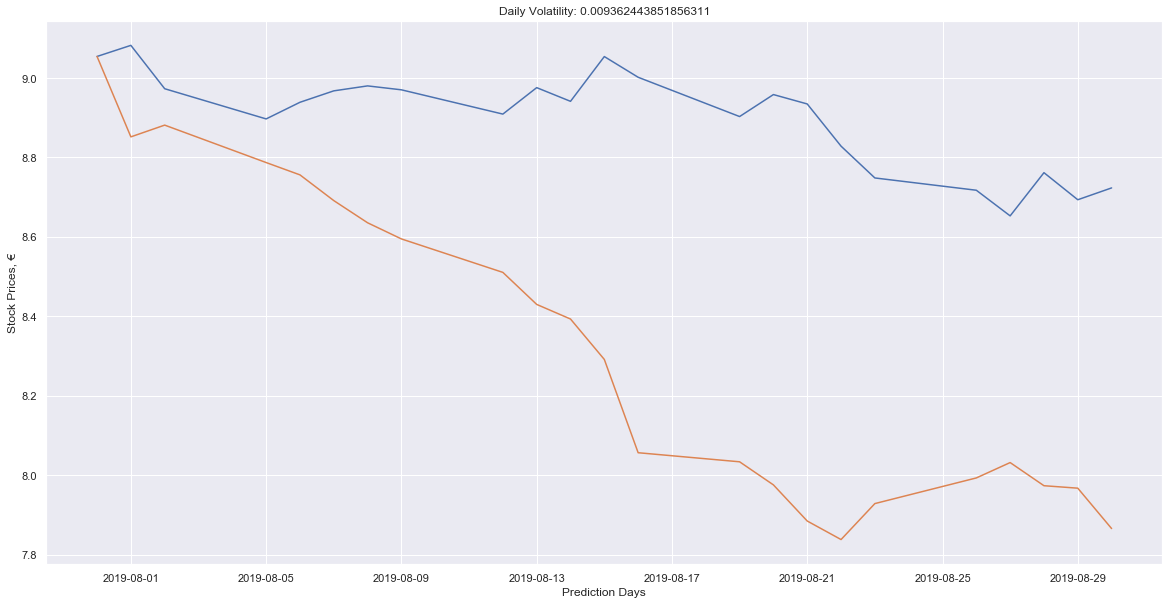

In [44]:
# Plotting the simulations
plt.figure(figsize = (20,10))

for i in range(scen_size):
    plt.title("Daily Volatility: " + str(sigma))
    plt.plot(pd.date_range(start = S_eon["Date"].max(), 
                end = pred_end_date, freq = 'D').map(lambda x:
                x if x.isoweekday() in range(1, 6) else np.nan).dropna(), S[i, :])
    plt.ylabel('Stock Prices, €')
    plt.xlabel('Prediction Days')
    
plt.show()

### Conclusion
In this article, we learned how to build a simulation model for stock prices using Geometric Brownian Motion in discrete-time context. Below is the full code. When you put your authorization token taken from Quandl after your registration and install the required Python packages, you can use the code right away. In each run, you will get different stock price scenarios. It is because we use np.random.normal() without setting seed. Each time we run the model, we will have a different array W and it will result in different predictions.
Geometric Brownian Motion helps us to see what paths stock prices may follow and lets us be prepared for what is coming. Of course, it is never possible to predict the exact future, but these statistical methods give us the chance of creating sound trading and hedging strategies that we can rely on.

# Moving Average Technical Analysis with Python
* Calculating and Plotting Moving Averages with Python

- https://towardsdatascience.com/moving-average-technical-analysis-with-python-2e77633929cb

## What are Moving Averages?
A moving average is the mean of the n last closing prices. The number of last closing prices n to select depends on the investor or analyst performing the analysis. A common approach is to take 20 days which are basically the number of trading days in a month.
The shorter the number of days, the more sensitive the moving average will be to price changes. That is, if we select a bigger number of days, the short term fluctuations will not be reflected in the indicator. However, by selecting a large number of days, we may miss some upcoming price changes due to overlooking short term fluctuations.
Below we can see how the simple moving average is calculated (source Investopedia).

## How to interpret Moving Averages and Crossovers
Financial analysts and investors can use moving averages to analyse price trends and predict upcoming change of trends. During a price uptrend, price is higher than moving averages. While in a price downtrend, prices are lower than moving averages. When closing price crosses the moving average, it can be seen by Investors as potential change in the price trend.
We may use multiple moving averages for different periods together. For example, we may have a short term moving average of 20 days and a long term moving average of 250 days. An indication of price trend change may be when the short term moving average is crossing the long term moving average:
When the short term moving average crosses above the long term moving average, this may indicate a buy signal. This is known as a golden cross.
Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to sell. This is known as a dead cross.

## Moving Average Technical Analysis using Python
Now that we understand how to calculate and interpret moving averages, we are ready to build this technical analysis tool with Python. Our goal is to have a script in which we will pass any company that we want to analyse and our function will:
First, download stock price information from a free API financial source named financialmodeliongprep.
Second, we will parse the result from the API and convert it into a Pandas DataFrame containing the date and the closing price for the last 1200 trading days.
Third, we will calculate the 20 and 250 days moving averages.
Finally, we will conclude our Moving Average Technical Analysis by plotting the closing price and moving averages together in a matplotlib graph.
The first thing we need to do is to import all required packages, create our stockpriceanalysis function and make an http request to the API end point to get the closing prices from the last few years.
We will use Apple as an example. Note that the API endpoint url takes as a parameter the ticker of the company that we want to get the data for. In our case, it will be the argument that we pass to our function (e.g. aapl for Apple).
Then, we can parse the response and keep only the last 1200 days of prices Please check the following article if you want to know more in detail how to parse and deal with the API response.
Now, we have a dictionary in the stockprices variable containing 1200 data points with the date and the closing price. We convert it into a Pandas DataFrame using the pd.DataFrame.from_dict() method and set the date as index.

In [45]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


def stockpriceanalysis(stock):
    stockprices = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{stock}?serietype=line")
    stockprices = stockprices.json()

#Parse the API response and select only last 1200 days of prices
    stockprices = stockprices['historical'][-1200:]

#Convert from dict to pandas datafram

    stockprices = pd.DataFrame.from_dict(stockprices)
    stockprices = stockprices.set_index('date')
    #20 days to represent the 22 trading days in a month
    stockprices['20d'] = stockprices['close'].rolling(20).mean()
    stockprices['250d'] = stockprices['close'].rolling(250).mean()

## Plotting the Moving Averages
Now that we have calculated the closing price, 20 and 250 days moving averages, we can plot them in a single chart using matplotlib. Then, we add a title and make the axis tight in order to enhance the plot layout.

In [46]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


def stockpriceanalysis(stock):
    stockprices = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{stock}?serietype=line")
    stockprices = stockprices.json()

#Parse the API response and select only last 1200 days of prices
    stockprices = stockprices['historical'][-1200:]

#Convert from dict to pandas datafram

    stockprices = pd.DataFrame.from_dict(stockprices)
    stockprices = stockprices.set_index('date')
    #20 days to represent the 22 trading days in a month
    stockprices['20d'] = stockprices['close'].rolling(20).mean()
    stockprices['250d'] = stockprices['close'].rolling(250).mean()
  
    stockprices[['close','20d','250d']].plot(figsize=(10,4))
    plt.grid(True)
    plt.title(stock + ' Moving Averages')
    plt.axis('tight')
    plt.ylabel('Price')

If we run the stock priceanalysis function and pass the Apple stock ticker as an argument, we will get a graph with the Apple moving averages and closing prices for the last few months:

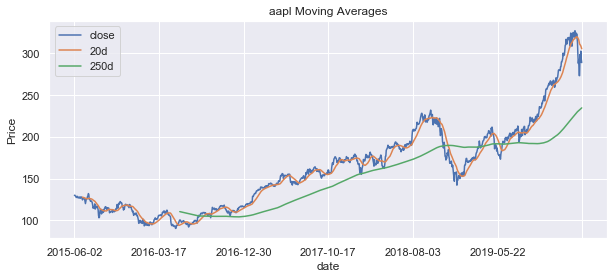

In [47]:
stockpriceanalysis('aapl')

By looking into the graph, we can see the result of our Moving Average Technical Analysis for Apple.
We can observe a crossover between the 20 day moving average and the latest closing price. This is a good indication that the upward trend is over and that a downward price trend is starting.
Further analysis should be done using fundamental tools in order to corroborate this potential trend price change. In some of my previous posts, you can find out some fundamental financial analysis tools using Python.

## Wrapping Up
We have built a very powerful tool to perform a simple Technical Analysis with Python using Moving Averages for 20 and 250 days. The script can be used to perform the analysis for other companies by simple passing the company ticker as the argument of our function.